In [ ]:
# Description: this program uses an artificial neural network called Long Short Term Memory(LSTM)
#               to predict the closing stock priice of a corporation (APPLE INC.) using the past 60 days stock price.

In [ ]:
# import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
df = tickerData.history(start='2015-01-01', end='2024-05-16')

# Show the data
print(df)


                                 Open        High         Low       Close  \
Date                                                                        
2015-01-02 00:00:00-05:00   24.861962   24.873123   23.960244   24.402176   
2015-01-05 00:00:00-05:00   24.170043   24.250394   23.527235   23.714720   
2015-01-06 00:00:00-05:00   23.779448   23.978094   23.353140   23.716953   
2015-01-07 00:00:00-05:00   23.926763   24.149961   23.815164   24.049522   
2015-01-08 00:00:00-05:00   24.379854   25.031590   24.261558   24.973558   
...                               ...         ...         ...         ...   
2024-05-09 00:00:00-04:00  182.312720  184.409882  181.863333  184.320007   
2024-05-10 00:00:00-04:00  184.899994  185.089996  182.130005  183.050003   
2024-05-13 00:00:00-04:00  185.440002  187.100006  184.619995  186.279999   
2024-05-14 00:00:00-04:00  187.509995  188.300003  186.289993  187.429993   
2024-05-15 00:00:00-04:00  187.910004  190.649994  187.369995  189.720001   

In [ ]:
# get number of rows and columns
df.shape

(2358, 7)

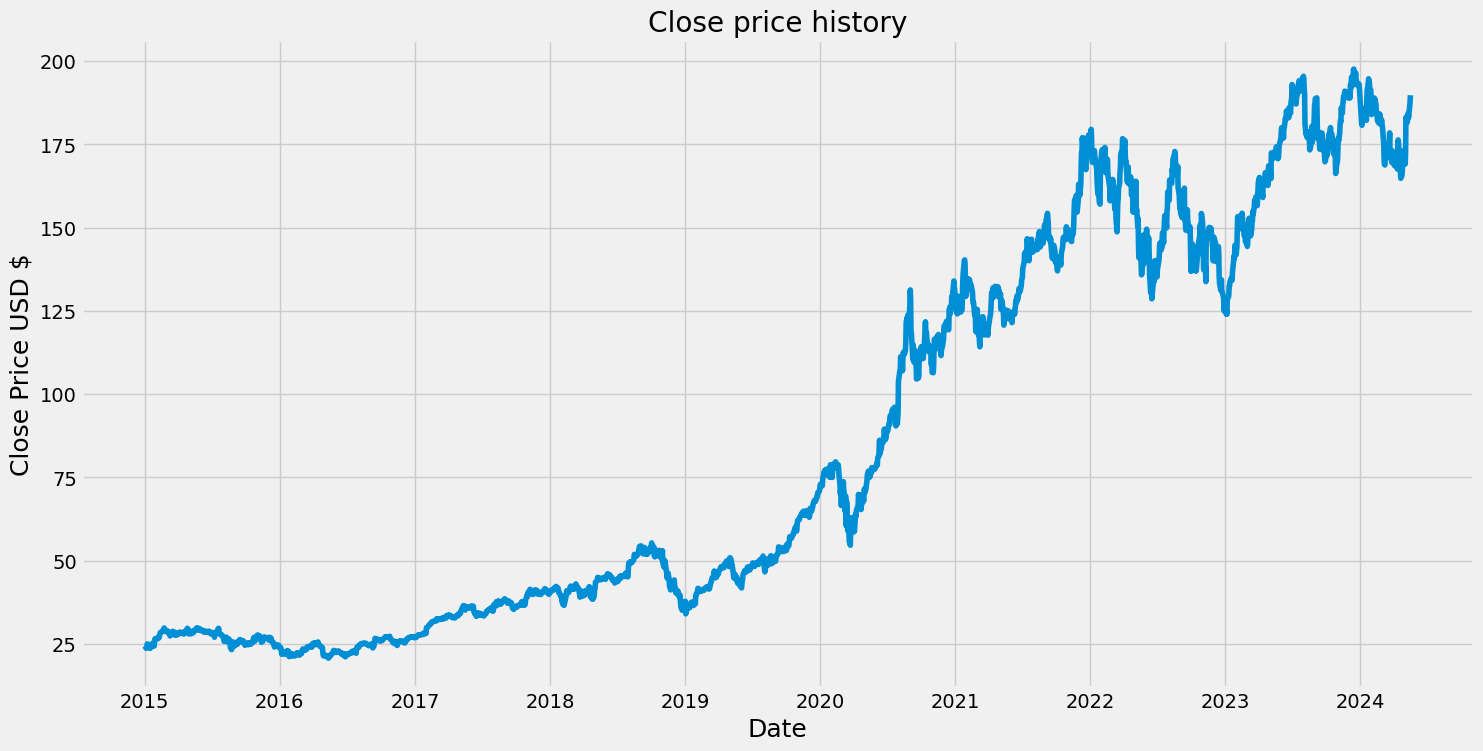

In [ ]:
# visualize the closing price
plt.figure(figsize=(16,8))
plt.plot(df.index, df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.title('Close price history')
plt.show()

we observe that APPLE stock price has been increasing during all these years.

In [ ]:
# create a new data frame with only the close column
data = df.filter(df[['Close']])
# convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1887

In [ ]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0206856 ],
       [0.01679827],
       [0.0168109 ],
       ...,
       [0.93604856],
       [0.94255138],
       [0.95550058]])

In [ ]:
# create the training dataset
# create the scaled training dataset
train_data = scaled_data[0:training_data_len]
# split the data into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i - 60:i,0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(X_train)
    print(y_train)
    print()

[array([0.0206856 , 0.01679827, 0.0168109 , 0.01869147, 0.02391657,
       0.02406802, 0.02058461, 0.02180887, 0.02127875, 0.01751768,
       0.01647015, 0.01991572, 0.02096324, 0.0245602 , 0.02529227,
       0.02544372, 0.02044578, 0.02823294, 0.03276391, 0.03056785,
       0.03242312, 0.03244839, 0.03359691, 0.03467392, 0.03339415,
       0.03439516, 0.03730946, 0.04093331, 0.0429353 , 0.04372092,
       0.04467121, 0.04579893, 0.04545676, 0.04678725, 0.05122203,
       0.05017039, 0.04588763, 0.04795298, 0.04546948, 0.04626775,
       0.04660984, 0.04557085, 0.04287195, 0.0431127 , 0.04379691,
       0.04046452, 0.03758822, 0.04038846, 0.03929878, 0.04102199,
       0.04367023, 0.04548216, 0.04425306, 0.04222575, 0.04388564,
       0.04322674, 0.03903271, 0.04012239, 0.03886796, 0.04282129])]
[0.04036314425546933]

[array([0.0206856 , 0.01679827, 0.0168109 , 0.01869147, 0.02391657,
       0.02406802, 0.02058461, 0.02180887, 0.02127875, 0.01751768,
       0.01647015, 0.01991572, 0.02

In [ ]:
# convert X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape

(1827, 60, 1)

### Build LSTM Model

In [ ]:
# Buld LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
#train the model
model.fit(X_train, y_train, batch_size=2, epochs=10)

Epoch 1/10
914/914 [==============================] - 46s 50ms/step - loss: 2.4418e-04
Epoch 2/10
914/914 [==============================] - 40s 44ms/step - loss: 2.5740e-04
Epoch 3/10
914/914 [==============================] - 40s 44ms/step - loss: 1.8507e-04
Epoch 4/10
914/914 [==============================] - 41s 44ms/step - loss: 2.1540e-04
Epoch 5/10
914/914 [==============================] - 38s 42ms/step - loss: 2.0504e-04
Epoch 6/10
914/914 [==============================] - 39s 43ms/step - loss: 1.8015e-04
Epoch 7/10
914/914 [==============================] - 39s 43ms/step - loss: 2.2880e-04
Epoch 8/10
914/914 [==============================] - 39s 43ms/step - loss: 1.5883e-04
Epoch 9/10
914/914 [==============================] - 38s 42ms/step - loss: 1.6740e-04
Epoch 10/10
914/914 [==============================] - 39s 43ms/step - loss: 1.9051e-04


In [ ]:
from re import X
# create the testing data set
# create a new array containing scaled values
test_data  = scaled_data[training_data_len - 60:, :]
#create the data sets x_test and y_test
X_test = []
y_test =  dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i,0])



In [ ]:
#convert the data to a numpy array
X_test = np.array(X_test)


In [ ]:
# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# get the model predicted price values
predictions = model.predict(X_test)
# let's unscaled our values to contain the same values as y_test dataset contains
predictions = scaler.inverse_transform(predictions)

15/15 [==============================] - 1s 27ms/step


In [ ]:
#get the root mean squared error(RMSE)
# RMSE is a good mesure of how accurate the model predict the response
# lower value of RMSE indicate a better fit
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.207484154184913

<ipython-input-24-86604dc74ed9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


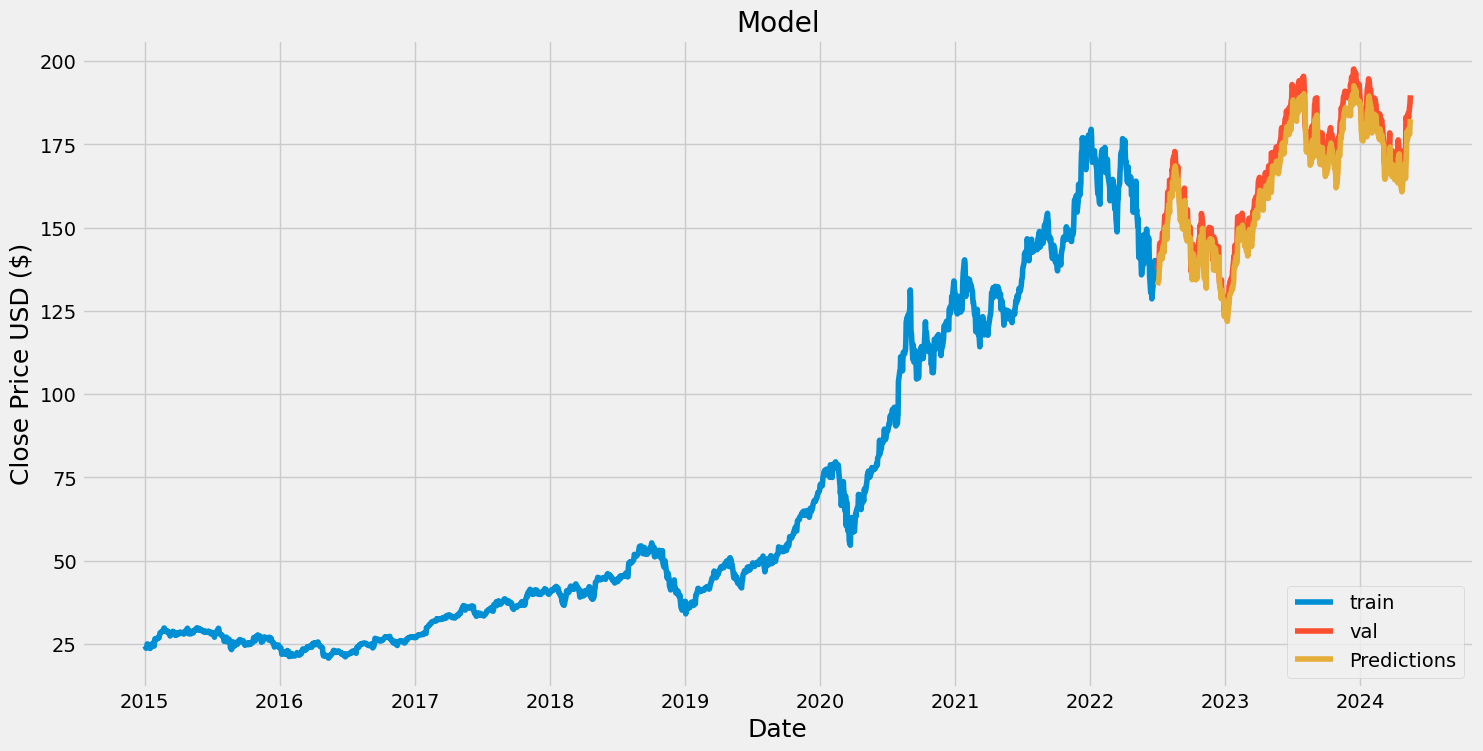

In [ ]:
# plot our data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['train', 'val', 'Predictions'], loc='lower right')
plt.show()

we see the blue line shows the training data, the red color line is the actual stock closing price value for Apple for the rest of the days. And the yellow line is the prediction wish our model predicted the model to be and we can see that train val and predictions lines are very close. It looks like our model is pretty descent.

In [ ]:
#show the valid(actual) and predicted prices
valid

,Close,Predictions
Date,,
2022-07-01 00:00:00-04:00,137.375763,132.697235
2022-07-05 00:00:00-04:00,139.976364,134.282440
2022-07-06 00:00:00-04:00,141.321136,136.780151
2022-07-07 00:00:00-04:00,144.712769,138.300201
2022-07-08 00:00:00-04:00,145.395050,141.401550
...,...,...
2024-05-09 00:00:00-04:00,184.320007,177.460999
2024-05-10 00:00:00-04:00,183.050003,179.556152
2024-05-13 00:00:00-04:00,186.279999,178.000305


We see that the differences price between our model and the actual price is close and doen't look very distance.

In [ ]:
# Get the quote using yfinance
apple_quote = yf.download('AAPL', start='2015-01-01', end='2024-05-16')

# Create new dataframe
new_df = apple_quote.filter(['Close'])

# Get the last 60 days' values and convert the dataframe to an array
last_60_days = new_df[-60:].values

 # Fit the scaler to the last 60 days data
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
x_test = []

# Append the past 60 days
x_test.append(last_60_days_scaled)

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape the data (1 sample, 60 timesteps, 1 feature)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(x_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)




[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 27ms/step
[[188.20628]]


This shows the predicted price for May 16, 2024. By looking at the actual price on the yahoo finance website for that day it was 189.84 which is pretty close.